## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### Get the max splitting

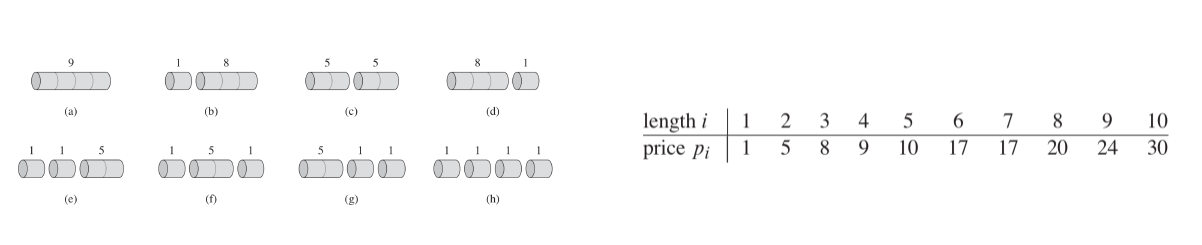

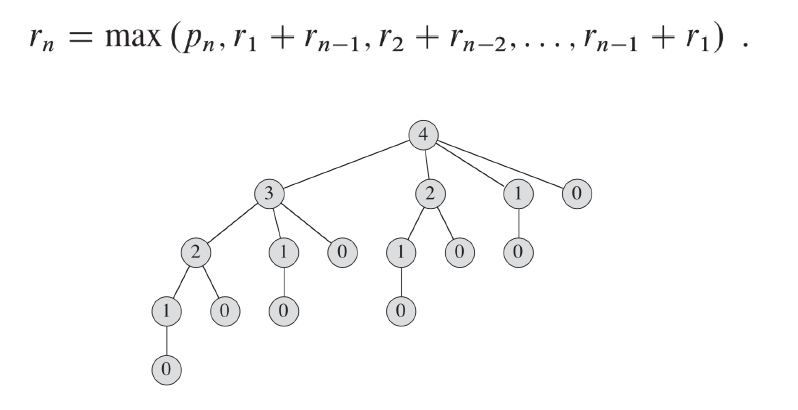

In [7]:
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(lambda: 0)

# ÈïøÂ∫¶‰∏∫1-10ÁöÑÂùóÂàÜÂà´ÂØπÂ∫î‰ª∑Ê†ºÁöÑÂ≠óÂÖ∏
for i, p in enumerate(original_price):
    price[i+1] = p

price[1]

1

In [8]:
from functools import wraps

In [31]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def _wraps(n):
        """n :  Êú®ÂùóÊÄªÈïøÂ∫¶"""
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return _wraps


compute_times = defaultdict(int)
def memo(f):
    '''ËÆ∞ÂøÜÂ∑≤ËÆ°ÁÆóËøáÁöÑÂáΩÊï∞
    Overlapping computing saved in a table
    '''
    memo.already_computed = {}
    @wraps(f)
    def _wraps(n):
        result = None
        if n in memo.already_computed: 
            result = memo.already_computed[n]
        else:
            result = f(n)
            memo.already_computed[n] = result
            compute_times[n] += 1
        return result
    return _wraps


solution = {}
@get_call_time
@memo
def f(n):
    """
    Overlapping Subproblems
    Args: n is the length
    Return: the max revenue 
    """
    # max_split:  cut index
    # price[n] : ÁªàÊ≠¢Êù°‰ª∂
    # f(i) +f(n-i) = f(n)  : ÈÄíÊé®ÂÖ≥Á≥ª
    max_price, max_split = max(
        [(price[n], 0)] + [(f(i) +f(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

In [33]:
f(30)

90

In [34]:
print(called_time_with_arg)

defaultdict(<class 'int'>, {('f', 1): 58, ('f', 2): 56, ('f', 3): 54, ('f', 4): 52, ('f', 5): 50, ('f', 6): 48, ('f', 7): 46, ('f', 8): 44, ('f', 9): 42, ('f', 10): 40, ('f', 11): 38, ('f', 12): 36, ('f', 13): 34, ('f', 14): 32, ('f', 15): 30, ('f', 16): 28, ('f', 17): 26, ('f', 18): 24, ('f', 19): 22, ('f', 20): 20, ('f', 21): 18, ('f', 22): 16, ('f', 23): 14, ('f', 24): 12, ('f', 25): 10, ('f', 26): 8, ('f', 27): 6, ('f', 28): 4, ('f', 29): 2, ('f', 30): 2})


In [35]:
print(compute_times)

defaultdict(<class 'int'>, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1})


In [36]:
print(solution)

{1: (1, 0), 2: (2, 0), 3: (3, 0), 4: (2, 2), 5: (3, 2), 6: (6, 0), 7: (6, 1), 8: (6, 2), 9: (6, 3), 10: (10, 0), 11: (10, 1), 12: (10, 2), 13: (10, 3), 14: (12, 2), 15: (13, 2), 16: (10, 6), 17: (16, 1), 18: (16, 2), 19: (16, 3), 20: (10, 10), 21: (20, 1), 22: (20, 2), 23: (20, 3), 24: (22, 2), 25: (23, 2), 26: (20, 6), 27: (26, 1), 28: (26, 2), 29: (26, 3), 30: (20, 10)}


In [41]:
def parse_solution(solution, n):
    """Parse solution"""
    left_split, right_split = solution[n]
    if right_split == 0: 
        return [left_split]
    return parse_solution(solution, left_split) + parse_solution(solution, right_split)

In [42]:
parse_solution(solution, 30)

[10, 10, 10]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import random


data = load_boston()
x,  y = data['data'][:, 5],  data['target']


def model(x, k, b):
    '''simple linear'''
    return x * k + b


def loss_abs(y, y_hat):
    return np.mean(np.abs(y - y_hat))


def mask(y, y_hat):
    return np.sign(y - y_hat)

def a_partial_k(x, y, y_hat):
    return np.mean(- x * mask(y, y_hat))

def a_partial_b(y, y_hat):
    return np.mean(-mask(y, y_hat))


def gradient_descend(x, y, times, model, learning_rate, loss_fun, partial_k, partial_b, threshold=1e-3):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    best_k, best_b = None, None
    min_loss =  float('inf')
    
    for i in range(times):
        y_hat = model(x, k, b)
        c_loss = loss_fun(y, y_hat)
        
        if c_loss < min_loss:
            min_loss = c_loss
            best_k, best_b = k, b
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
         
        k_gradient = partial_k(x, y, y_hat)
        b_gradient = partial_b(y, y_hat)
        
        k = k - learning_rate * k_gradient
        b = b - learning_rate * b_gradient
        
    return best_k, best_b

In [2]:
gradient_descend(x, y, 2000, model, 0.1, loss_abs, a_partial_k, a_partial_b)

When time is : 0, get best_k: 50.68594638330546 best_b: 77.05097752813478, and the loss is: 373.0608128000141
When time is : 50, get best_k: 19.262774446546462 best_b: 72.05097752813506, and the loss is: 170.57766588659143
When time is : 100, get best_k: -7.44076903171441 best_b: 67.72093800244356, and the loss is: 9.570257611779873
When time is : 150, get best_k: -7.476899071240114 best_b: 67.37034511706823, and the loss is: 9.531677234056342
When time is : 200, get best_k: -7.423193537643288 best_b: 67.0343767376218, and the loss is: 9.508525426790973
When time is : 250, get best_k: -7.369488004046461 best_b: 66.69840835817537, and the loss is: 9.485373619525603
When time is : 300, get best_k: -7.313455197722362 best_b: 66.36283523564593, and the loss is: 9.462223373540676
When time is : 350, get best_k: -7.258054802465454 best_b: 66.02765737003322, and the loss is: 9.439144740842508
When time is : 400, get best_k: -7.202489980331072 best_b: 65.69287476133773, and the loss is: 9.4161

(-5.472406778750181, 55.00749926726329)

### Part 3: Finish the Solution Parse Part of Edit-Distance

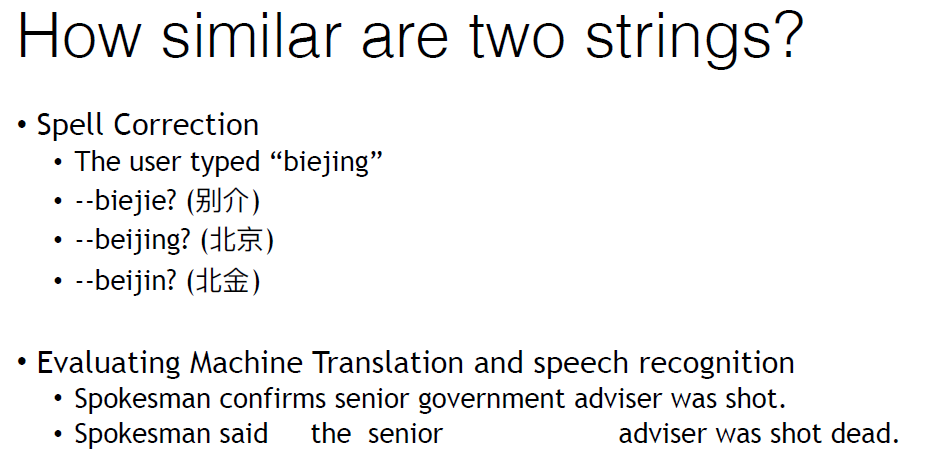

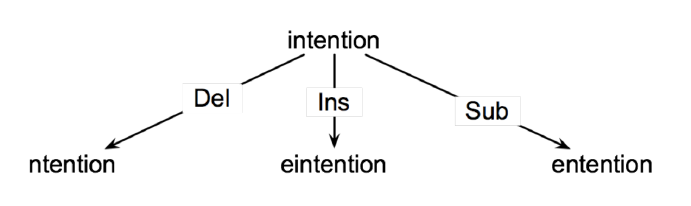

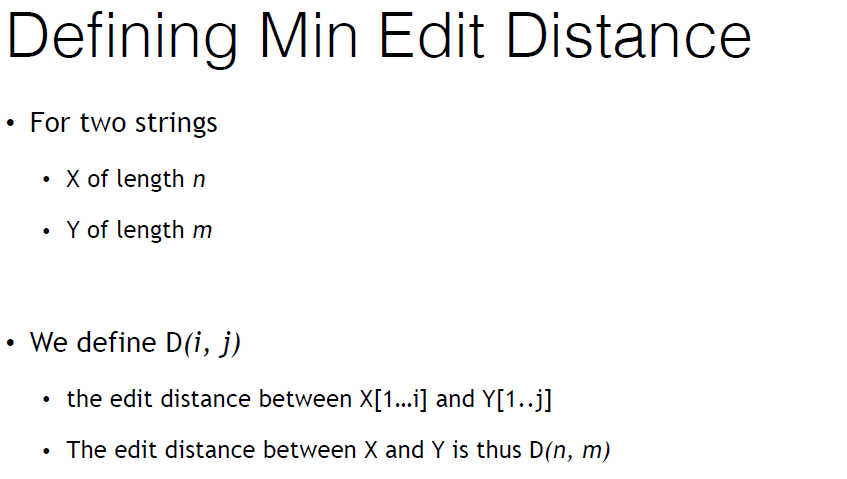

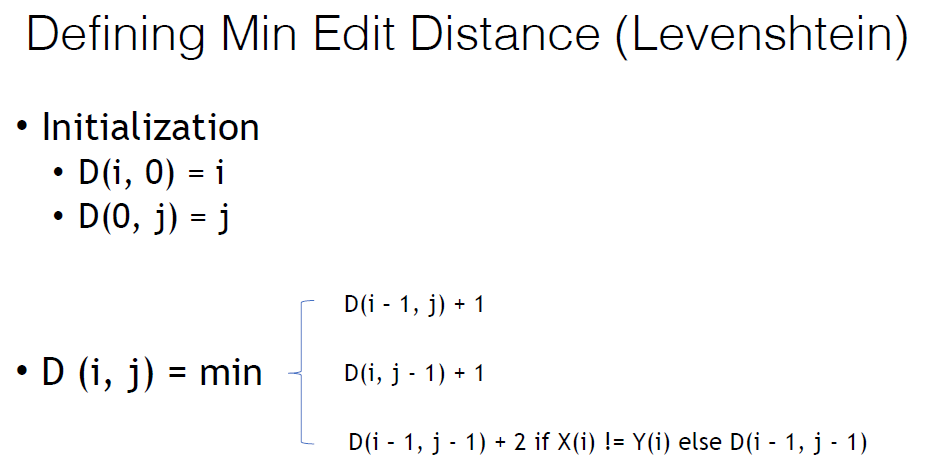
D(i-1, j-1)+1

In [ ]:
# overlapping problem
# XÂà∞YÁöÑÊúÄÂ∞èÁºñËæëË∑ùÁ¶ª
# D(i-1, j)+1       -> XÈÄâÊã©  Âà†Èô§  ÊúÄÂêé‰∏Ä‰ΩçÔºånextÂ∫èÂàó
# D(i, j-1)+1       -> XÈÄâÊã©  Ê∑ªÂä†  YÁöÑÊúÄÂêé‰∏Ä‰ΩçÔºåÁÑ∂Âêé‰∏§‰∏™ÊúÄÂêé‰∏Ä‰Ωç‰∏çËÄÉËôëÔºånextÂ∫èÂàó
# D(i-1, j-1)+1   -> Âú®ÊúÄÂêé‰∏Ä‰Ωç‰∏çÂêåÊó∂ÔºåXÊúÄÂêé‰∏Ä‰Ωç  ÊõøÊç¢ +1, nextÂ∫èÂàó
# D(i-1, j-1)        -> ÊúÄÂêé‰∏Ä‰ΩçÁõ∏ÂêåÔºå‰∏çÁºñËæëÔºånextÂ∫èÂàó

# D(i, j) = min([D(i-1, j)+1, D(i, j-1)+1, D(i-1, j-1)+1 if X(i) != Y(i) else D(i-1, j-1)])


# ÁªàÊ≠¢Êù°‰ª∂
# D(i, 0) = j
# D(0, j) = i

In [13]:
from functools import lru_cache

solutions = {}
@lru_cache(2**10)  # ÁºìÂ≠òËÆ°ÁÆóÁªìÊûúÔºåÁõ¥Êé•‰ΩøÁî®
def edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    min_dist, ops = min([
                                         (edit_distance(string1[:-1], string2)+1, 'left del %s' %string1[-1]), 
                                         (edit_distance(string1,string2[:-1])+1, 'left add %s' %string2[-1]),
                                         (edit_distance(string1[:-1], string2[:-1])+1, 'left sub as %s' %string2[-1]) \
                                              if string1[-1] != string2[-1] else (edit_distance(string1[:-1], string2[:-1]), 'nope')
                                         ],
                                         key=lambda x: x[0]
                                    )
    
    solutions[((string1, string2))] = ops
    
    return min_dist

In [14]:
edit_distance('ABCDE', 'ABCCEF')

2

In [15]:
solutions

{('A', 'A'): 'nope',
 ('A', 'AB'): 'left add B',
 ('A', 'ABC'): 'left add C',
 ('A', 'ABCC'): 'left add C',
 ('A', 'ABCCE'): 'left add E',
 ('A', 'ABCCEF'): 'left add F',
 ('AB', 'A'): 'left del B',
 ('AB', 'AB'): 'nope',
 ('AB', 'ABC'): 'left add C',
 ('AB', 'ABCC'): 'left add C',
 ('AB', 'ABCCE'): 'left add E',
 ('AB', 'ABCCEF'): 'left add F',
 ('ABC', 'A'): 'left del C',
 ('ABC', 'AB'): 'left del C',
 ('ABC', 'ABC'): 'nope',
 ('ABC', 'ABCC'): 'left add C',
 ('ABC', 'ABCCE'): 'left add E',
 ('ABC', 'ABCCEF'): 'left add F',
 ('ABCD', 'A'): 'left del D',
 ('ABCD', 'AB'): 'left del D',
 ('ABCD', 'ABC'): 'left del D',
 ('ABCD', 'ABCC'): 'left sub as C',
 ('ABCD', 'ABCCE'): 'left add E',
 ('ABCD', 'ABCCEF'): 'left add F',
 ('ABCDE', 'A'): 'left del E',
 ('ABCDE', 'AB'): 'left del E',
 ('ABCDE', 'ABC'): 'left del E',
 ('ABCDE', 'ABCC'): 'left del E',
 ('ABCDE', 'ABCCE'): 'nope',
 ('ABCDE', 'ABCCEF'): 'left add F'}

In [33]:
parsed = []
def parse_solutions(solutions, string1, string2):
    operation = solutions[(string1, string2)]
    
    if string1 == string2: 
        return parsed
    elif operation.startswith('left add'): 
        string1 = string1
        string2 = string2[:-1]
    elif operation.startswith('left del'): 
        string1 = string1[:-1]
        string2 = string2
    elif operation.startswith('left sub as') or operation.startswith('nope'): 
        string1 = string1[:-1]
        string2 = string2[:-1]
        
    parsed.append(operation)
    
    return parse_solutions(solutions, string1, string2)
    

In [34]:
parse_solutions(solutions, 'ABCDE', 'ABCCEF')

['left add F', 'nope', 'left sub as C']

In [4]:
# reference
# from functools import lru_cache


# solution = {}
# @lru_cache(maxsize=2**10)
# def edit_distance(string1, string2):
    
#     if len(string1) == 0: return len(string2)
#     if len(string2) == 0: return len(string1)
    
#     tail_s1 = string1[-1]
#     tail_s2 = string2[-1]
    
#     candidates = [
#         (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
#         (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
#     ]
    
#     if tail_s1 == tail_s2:
#         both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
#     else:
#         both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

#     candidates.append(both_forward)
    
#     min_distance, operation = min(candidates, key=lambda x: x[0])
    
#     solution[(string1, string2)] = operation 
    
#     return min_distance

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ ÈªëÂÆ¢‰∏éÁîªÂÆ∂
+ Êï∞Â≠¶‰πãÁæé
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¬∂

Ans: According to the definition of gradient, it`s the fastest ascend direction of target function. We can update the params along the opposite gradient direction to minimize loss of training precisely and fast.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¬∂

Ans: Gredient is the partial derivative vector of a function. Descent means updating the params alone the negative gradient direction which the target decrease fastest.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: This methds always know which direction is the best to get to the optimal, it's efficient and can get better definitely.

4. Using the simple words to describe: What's the machine leanring.¬∂

Ans: Machine learning is the method that uses data itself to generate the best general function that solves the problem we defined.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Âõ†‰∏∫Âú®Ëß£ÂÜ≥ÂÖ∑ÊúâÈáçÂ§çÁõ∏ÂêåÂ≠êÁªìÊûÑÁöÑÈóÆÈ¢òÁöÑÊó∂ÂÄôÔºå‰ΩøÁî®Â∏∏ËßÑÁöÑÈÄíÂΩíÊñπÊ≥ïÊ±ÇËß£‰ºöÂá∫Áé∞Â§ßÈáèÁöÑÈáçÂ§çËÆ°ÁÆóÔºå‰ªéËÄå‰ΩøÂæóÁÆóÊ≥ïÂ§çÊùÇÂ∫¶ËææÂà∞nÔºÅÔºåÊïàÁéáÊûÅ‰Ωé„ÄÇÂä®ÊÄÅËßÑÂàíÈÄöËøáÊü•Ë°®ËÆ∞ÂΩïÁöÑÊñπÂºèÔºåËßÑÈÅø‰∫ÜÁõ∏ÂêåÂ≠êÈóÆÈ¢òÁöÑÊ±ÇËß£ÈáçÂ§ç„ÄÇ

Âä®ÊÄÅËßÑÂàíÂ§ÑÁêÜÁöÑÊòØÂÖ∑ÊúâÁõ∏ÂêåÂ≠êÈóÆÈ¢òÁöÑÈáçÂ§çÈÄíÂΩíËøáÁ®ãÔºåËÄåÊêúÁ¥¢ÁÆóÊ≥ïÊòØÂú®‰∏çÂêåÁöÑË∑ØÂæÑ‰∏ãÈÅçÂéÜÂØªÊâæÊúÄ‰ºòÁöÑÊüê‰∏ÄÊù°Ë∑ØÂæÑ„ÄÇ

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

‰ΩøÁî®Âä®ÊÄÅËßÑÂàíÂèØ‰ª•Ëß£ÂÜ≥‰∏Ä‰∏™Â§çÊùÇ‰ΩÜÂ≠êÁªìÊûÑÁÆÄÂçïÁöÑÈóÆÈ¢òÔºåÂπ∂‰∏îÊ≤°ÊúâÊú∫Âô®Â≠¶‰π†ÁπÅÁêêÁöÑÁÆóÊ≥ïÁ†îÁ©∂ÊµÅÁ®ã„ÄÇÂØπ‰∫éËøôÁ±ªÈóÆÈ¢òÔºåÂèØ‰ª•ÈááÁî®Êú∫Âô®Â≠¶‰π†Âú®Ë∂≥Â§üÂ§öÊï∞ÊçÆÈ©±Âä®‰∏ãÊãüÂêà‰∏Ä‰∏™ÊñπÁ®ãÔºå‰ΩÜÊòØËøô‰∏ç‰ªÖÊïàÁéá‰ΩéËÄå‰∏îÂºÄÈîÄÂ§ß„ÄÇÂØπ‰∫éËßÑÂæãËÉΩÂ§üÁõ¥Êé•Ë°®Á§∫ÁöÑÂú∫ÊôØÔºå‰ΩøÁî®Êú∫Âô®Â≠¶‰π†Âè™ËÉΩËØ¥ÊòØÂ§öÊ≠§‰∏Ä‰∏æ„ÄÇ

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ë∑ØÂæÑÂØª‰ºòÔºåÁîü‰∫ßÂºÄÊîæÊñπÊ°àÔºåviterbiËß£Á†ÅÁ≠â

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

ÊãºÂÜôÈîôËØØÊ£ÄÊü•ÔºåËæìÂÖ•Ê≥ïÊô∫ËÉΩÂÄôÈÄâÔºåÊñáÊú¨Áõ∏‰ººÂ∫¶Ê£ÄÊµã

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

1. ÂÖ∑ÊúâÈÄíÊé®ÂÖ≥Á≥ªÁöÑÈáçÂ§çÁöÑÂ≠êÈóÆÈ¢òÔºöÂ≠êÈóÆÈ¢òÊù°‰ª∂Áõ∏ÂêåÔºåËß£ÂÜ≥ÊñπÊ≥ïÁõ∏ÂêåÔºåÂ≠êÈóÆÈ¢òÁöÑËß£ÂåÖÂê´Âú®Êï¥‰ΩìÊúÄ‰ºòËß£‰πã‰∏≠„ÄÇÂêåÊó∂ÊúâÊòéÁ°ÆÁöÑËæπÁïåÊù°‰ª∂„ÄÇ
1. Â∞ÜÂ∑≤ËÆ°ÁÆóÁöÑÂ≠êÈóÆÈ¢òÂÇ®Â≠òËµ∑Êù•ÔºöÂΩìÈ¶ñÊ¨°ËÆ°ÁÆóÂêéÔºåÂ≠òÂÇ®Âú®ÂÆö‰πâÁöÑÊï∞ÊçÆÁªìÊûÑ‰∏≠ÔºåÂÜçÊ¨°ËÆ°ÁÆóÊó∂Âè™ÈúÄË¶ÅÊü•Ë°®ÂèñÂÄº„ÄÇ
1. ÈóÆÈ¢òÊï¥‰ΩìÁöÑËß£ÂèØÁî±Â≠êÈóÆÈ¢òÁöÑËß£Ëß£ÊûêÂæóÂà∞ÔºöÊ†πÊçÆÊØè‰∏ÄÊ¨°ËÆ°ÁÆóÁöÑÁªìÊûúÔºåÊü•ËØ¢Â≠êÈóÆÈ¢òÁöÑËß£ÔºåÈÄíÂΩíÂú∞Ê±ÇËß£ÂæóÂá∫Êï¥‰ΩìÁöÑÊ±ÇËß£Ë∑ØÂæÑ„ÄÇ

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

1. Ê≤°ÊúâÁªü‰∏ÄÁöÑÁÆóÊ≥ïÂΩ¢ÂºèÔºåÂÖ∑‰ΩìÈóÆÈ¢òÂÖ∑‰ΩìÂàÜÊûê

2. ÂÇ®Â≠ò‰∏≠Èó¥ÁªìÊûúÂíåÂàíÂàÜÁöÑÂ≠êÈóÆÈ¢òÔºåÊ∂àËÄóÂÜÖÂ≠ò

3. ÂΩìÈóÆÈ¢ò‰∏≠ÁöÑÂü∫Êú¨ÂÖÉÁ¥†‰∏çÂÖ∑Â§áÈöêÂºèÊàñËÄÖÊòæÁ§∫ÁöÑÈ°∫Â∫èÂÖ≥Á≥ªÊó∂ÔºåÂàíÂàÜÂ≠êÈóÆÈ¢òÁöÑÊêúÁ¥¢Á©∫Èó¥‰ºöÂæàÂ§ß„ÄÇÊØîÂ¶ÇÔºåedit distanceÈóÆÈ¢òÔºåÂΩìÂ≠óÁ¨¶‰∏≤‰∏çË¶ÅÊ±ÇÊúâ‰∏ÄÂÆöÈ°∫Â∫èÊó∂ÔºåÈÇ£‰πàÈúÄË¶ÅÂ≠òÂÇ®ÁöÑÂ≠êÈóÆÈ¢òÂ∞Ü‰ºöÊòØÊåáÊï∞Á∫ßÂ¢ûÈïøÔºåÂ§ÑÁêÜÂ§çÊùÇÈóÆÈ¢òÊó∂ÔºåÂÜÖÂ≠ò‰∏ÄËà¨‰ºö‰∏çÂ§ü„ÄÇ

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [2]:
import random
import matplotlib.pylab as plt

In [3]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

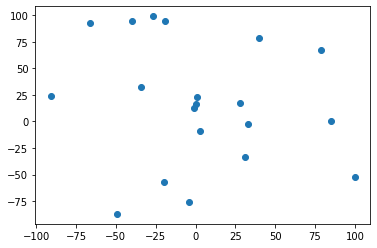

In [4]:
plt.scatter(latitudes, longitude)

ÁªôÂÆö‰∏Ä‰∏™ÂàùÂßãÁÇπ ùëÉ, Â∑≤Áªè ùëò‰∏™ËΩ¶ËæÜÔºåÂ¶Ç‰Ωï‰ªéËØ•ÁÇπÂá∫ÂèëÔºåÁªèËøô k ‰∏™ËΩ¶ËæÜÁªèËøáÊâÄ‰ª•ÁöÑÁÇπÂÖ®ÈÉ®‰∏ÄÊ¨°ÔºåËÄå‰∏îÊâÄËµ∞ËøáÁöÑË∑ØÁ®ãÊúÄÁü≠?

‰æãÂ¶ÇÔºö

In [5]:
p1 = (-50, 10)
p2 = (1, 30)
p3 = (99, 15)

In [6]:
import matplotlib.pyplot as plt

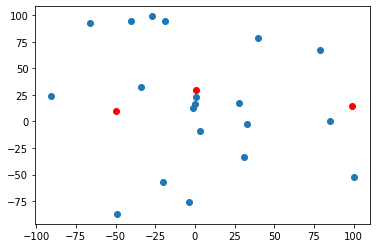

In [7]:
plt.scatter(latitudes, longitude)
plt.scatter([p1[0]], [p1[1]], color='r')
plt.scatter([p2[0]], [p2[1]], color='r')
plt.scatter([p3[0]], [p3[1]], color='r')

### try

In [8]:
# 1. divide into three single problem
# 2. solve sub problem separately 

latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

points = list(zip(latitudes, longitude))
p1 = (-50, 10)
p2 = (1, 30)
p3 = (99, 15)

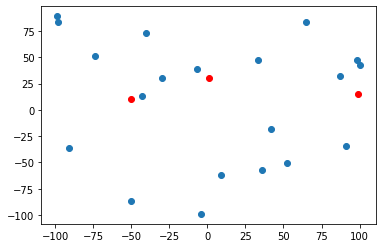

In [9]:
plt.scatter(latitudes, longitude)
plt.scatter([p1[0]], [p1[1]], color='r')
plt.scatter([p2[0]], [p2[1]], color='r')
plt.scatter([p3[0]], [p3[1]], color='r')

In [10]:
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**(1/2)

def compare(point, *p):
    return min((*p), key=lambda p : distance(p, point))

def divide(points, p1, p2, p3):
    set_1 = set(); set_2 = set(); set_3 = set()
    for p in points:
        if compare(p, p1, p2, p3) == p1:
            set_1.add(p)
        if compare(p, p1, p2, p3) == p2:
            set_2.add(p)
        if compare(p, p1, p2, p3) == p3:
            set_3.add(p)
            
    return set_1, set_2, set_3

In [11]:
set_1, set_2, set_3 = divide(points, p1, p2, p3)

In [12]:
print(set_1)
print(set_2)
print(set_3)

{(-50, -87), (-98, 84), (-4, -99), (-30, 30), (-74, 51), (-99, 89), (-91, -36), (-43, 13)}
{(-40, 73), (36, -57), (9, -62), (-7, 39), (33, 47), (42, -18)}
{(52, -51), (87, 32), (91, -34), (65, 84), (98, 47), (100, 43)}


#### Ë∑ØÂæÑÊ±ÇËß£

ÊØè‰∏ÄÊ≠•ÊâæÁÇπË¥™ÂøÉÊ±ÇËß£ÔºåÊÉ≥ÂæóÁÆÄÂçï‰∫ÜÔºå‰ΩÜÊòØÊöÇÊó∂Ê≤°ÊúâÊÉ≥Âà∞Êõ¥Â•ΩÁöÑÊ±ÇËß£ÊúÄ‰ºòËß£ÁöÑÊñπÊ≥ï

In [25]:
# ÂÜçÊ¨°ËøêË°åÂâçÔºåÈáçÁΩÆset
set_1, set_2, set_3 = divide(points, p1, p2, p3)

computed = {}
def calculate(point, points):
    res_cur = {}
    for p in points:
        if computed.get((p, point), False):
            res_cur[(p, point)] = computed[(p, point)]
        else:
            res_cur[(p, point)] = distance(p, point)
        computed.update(res_cur)
    
    min_p = min(res_cur, key=res_cur.get)[0]
    
    return min_p


path1 = []
path2 = []
path3 = []
def find_path(p_cur, set_cur, path):
    if len(set_cur) == 0: 
        return path
    
    next_point = calculate(p_cur, set_cur)
    path.append(next_point)
    
    set_cur.remove(next_point)
    p_cur = next_point
    
    return find_path(p_cur, set_cur, path)

In [26]:
find_path(p1, set_1, path1)

[(-43, 13),
 (-30, 30),
 (-74, 51),
 (-98, 84),
 (-99, 89),
 (-91, -36),
 (-50, -87),
 (-4, -99)]

In [28]:
find_path(p2, set_2, path2)

[(-7, 39), (33, 47), (42, -18), (36, -57), (9, -62), (-40, 73)]

In [29]:
find_path(p3, set_3, path3)

[(87, 32), (100, 43), (98, 47), (65, 84), (91, -34), (52, -51)]